# **Importing Modules**

In [1109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style 
style.use('ggplot')

# **Viewing Data**

In [1110]:
#Reading Training Data
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [1111]:
#Looking at the data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1112]:
#Checking the Null values, and stats of the data
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **Feature Engineering**

In [1113]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

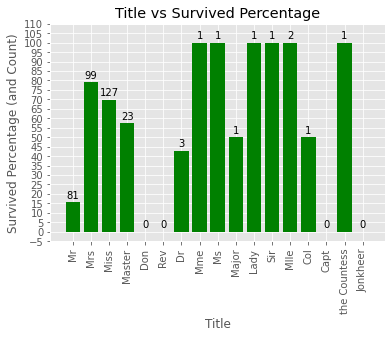

In [1114]:
survivedPercentages = []
survivedCounts = []
fig, ax = plt.subplots()
for idx, i in enumerate(df['Title'].unique()):
    #print(i)
    tempdf = df[df['Title'] == i]
    totalCount = len(tempdf)
    survivedPercentages.append(len(tempdf[tempdf['Survived'] == 1])/totalCount*100)
    survivedCounts.append(len(tempdf[tempdf['Survived'] == 1]))
    
xrange = range(len(df['Title'].unique()))
ax.bar(xrange, survivedPercentages, color = "green")    
ax.set_xticks(xrange)
ax.set_xticklabels(df['Title'].unique(), rotation = 90)
ax.set_yticks(range(-5, 111, 5))
for idx, val in enumerate(survivedCounts):
    ax.text(idx, survivedPercentages[idx]+2, str(survivedCounts[idx]), horizontalalignment = 'center')
plt.title("Title vs Survived Percentage")
plt.xlabel("Title")
plt.ylabel("Survived Percentage (and Count)")
plt.show()
#df

In [1115]:
#0/B - Boy, 1/G - Girl, 2/W - Woman, 3/M - Man (M to be filled as default)
#TitleDict = {'Master' : 'B', 'Miss' : 'G','Ms' : 'G', 'Mlle' : 'G', 'Mrs' : 'W', 'Mme' : 'W', 'Lady' : 'W', 'the Countess' : 'W'}
TitleDict = {'Master' : 1, 'Miss' : 1,'Ms' : 1, 'Mlle' : 1, 'Mrs' : 2, 'Mme' : 2, 'Lady' : 2, 'the Countess' : 2}
CabinDict = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8,}
EmbarkedDict = {'C' : 1, 'S' : 2, 'Q' : 3}
SexDict = {'female' : 0, 'male' : 1}

In [1116]:
#Average of Mean and Median
fillAge = (df['Age'].mean() + df['Age'].median())/2
fillFare = (df['Fare'].mean() + df['Fare'].median())/2
print(f"Fill Age: {fillAge} \tFill Fare: {fillFare}")

Fill Age: 28.84955882352941 	Fill Fare: 23.3292039842873


In [1117]:
df['Age'].fillna(fillAge, inplace = True)
df['Sex'] = df['Sex'].map(SexDict)

df['Title'] = df['Title'].map(TitleDict)
df['Title'].fillna(3, inplace = True)

df['Cabin'].fillna('C', inplace = True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Cabin'] = df['Cabin'].map(CabinDict)

df['Embarked'].fillna('S', inplace = True)
df['Embarked'] = df['Embarked'].map(EmbarkedDict)

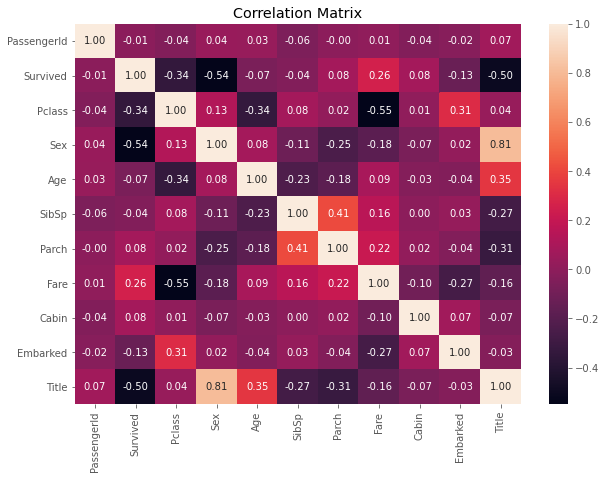

In [1118]:
plt.figure(figsize = (10, 7))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

In [1119]:
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis = 1) 
y = df['Survived'].values

#Dummies to simulate One-Hot Encoding
X = pd.get_dummies(X)
columns = X.columns

In [1120]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Model Fitting**

In [1121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
clf = RandomForestClassifier(n_estimators = 100, max_depth=7, min_samples_split=3, n_jobs=-1)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print(f"Accuracy on Validation Set: {acc*100}")

Accuracy on Validation Set: 81.61434977578476


# **Feature Importance**

In [1122]:
featureimp = []
for i in range(len(X[0])):
    Xtemp = X_test
    Xtemp[:][i] = 0
    score = clf.score(Xtemp, y_test)
    #featureimp.append(score)
    featureimp.append(acc - score)
#featureimp

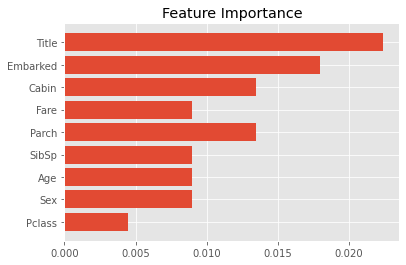

In [1123]:
plt.barh(columns, featureimp)
plt.title("Feature Importance")
plt.show()

# **Test Data**

In [1124]:
X_Test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [1125]:
X_Test['Age'].fillna(fillAge, inplace = True)
X_Test['Sex'] = X_Test['Sex'].map(SexDict)

X_Test['Title'] = X_Test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
X_Test['Title'] = X_Test['Title'].map(TitleDict)
X_Test['Title'].fillna(3, inplace = True)

X_Test['Cabin'].fillna('C', inplace = True)
X_Test['Cabin'] = X_Test['Cabin'].apply(lambda x: x[0])
X_Test['Cabin'] = X_Test['Cabin'].map(CabinDict)

X_Test['Embarked'].fillna('S', inplace = True)
X_Test['Embarked'] = X_Test['Embarked'].map(EmbarkedDict)

X_Test['Fare'].fillna(fillFare, inplace = True)

#Changing from float64 to float32 since RF implicitly converts while fitting to float32
#Which doesn't happen during predicting
X_Test['Age'] = X_Test['Age'].astype(np.float32)
X_Test['Fare'] = X_Test['Fare'].astype(np.float32)
X_Test['Title'] = X_Test['Title'].astype(np.float32)

In [1126]:
PID = X_Test['PassengerId']
X_Test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True) 
X_Test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,1,34.500000,0,0,7.829200,3,3,3.0
1,3,0,47.000000,1,0,7.000000,3,2,2.0
2,2,1,62.000000,0,0,9.687500,3,3,3.0
3,3,1,27.000000,0,0,8.662500,3,2,3.0
4,3,0,22.000000,1,1,12.287500,3,2,2.0
...,...,...,...,...,...,...,...,...,...
413,3,1,28.849558,0,0,8.050000,3,2,3.0
414,1,0,39.000000,0,0,108.900002,3,1,3.0
415,3,1,38.500000,0,0,7.250000,3,2,3.0
416,3,1,28.849558,0,0,8.050000,3,2,3.0


In [1127]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float32
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float32
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
 8   Title     418 non-null    float32
dtypes: float32(3), int64(6)
memory usage: 24.6 KB


In [1128]:
X_Test = pd.get_dummies(X_Test)
X_Test = scaler.fit_transform(X_Test)
ypred = clf.predict(X_Test)
#ypred

In [1129]:
submission = pd.DataFrame({'PassengerId': PID, 'Survived': ypred})
submission.to_csv("TitanicRF.csv", index = False)

In [1130]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
